**Import required modules**

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
import matplotlib.pyplot as plt
import pickle

*open processed data(p_data.txt)*

In [30]:
with open ('/kaggle/input/text-data/p_data.txt' , 'r') as f:
  data = f.read()

**Tokenize the TEXT**

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

**Create input sequence**

In [32]:
input_sequences = []
for line in data.split('\n'):
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

**Pad sequences**

In [33]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

**Creating features and lables**

In [34]:
x , y = input_sequences[:,:-1] , input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

**Defining Model**

In [35]:
model = Sequential()
model.add(Embedding(total_words, 64 , input_length=max_sequence_len-1))
model.add(LSTM(64))
model.add(Dense(total_words, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model**

Epoch 1/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.0649 - loss: 7.6592 - val_accuracy: 0.0789 - val_loss: 6.9946
Epoch 2/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.0807 - loss: 6.9624 - val_accuracy: 0.0844 - val_loss: 6.7150
Epoch 3/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.0848 - loss: 6.7192 - val_accuracy: 0.0968 - val_loss: 6.4382
Epoch 4/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.0984 - loss: 6.4304 - val_accuracy: 0.1041 - val_loss: 6.1649
Epoch 5/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.1047 - loss: 6.1887 - val_accuracy: 0.1122 - val_loss: 5.9164
Epoch 6/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.1114 - loss: 5.9582 - val_accuracy: 0.1202 - val_loss: 5.6822
Epoch 7/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.1172 - loss: 5.7456 - val_accuracy: 0.1316 - val_loss: 5.4656
Epoch 8/60
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 78s 60ms/step - accuracy: 0.1308 -

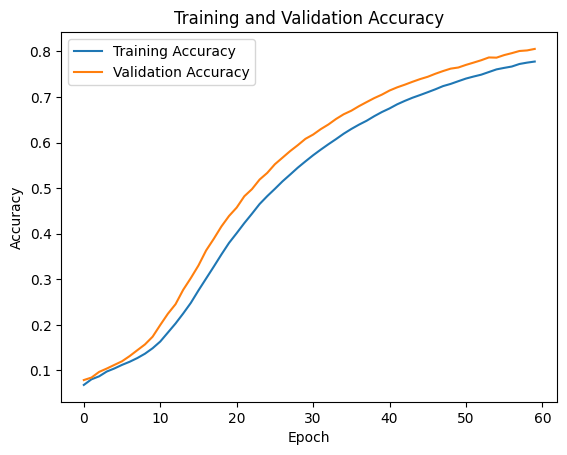

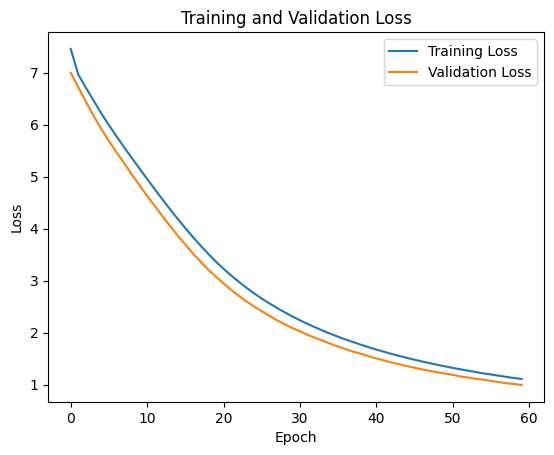

In [37]:
# Assuming you have a history object from your model's training
history = model.fit( x , y , epochs=60, verbose= 1 , validation_data=(x , y))

# Extract accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**save the model using pickel**

In [ ]:
import pickle

model.save ("textgen_lSTM.keras" , "w")
    
with open ('tokenizer.pickle' , 'wb') as f:
  pickle.dump(tokenizer , f )

In [ ]:
# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))

# First LSTM layer with dropout for regularization
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(32))

# Dense layer with ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer with softmax activation
model.add(Dense(total_words, activation='softmax'))

# Define the optimizer with a custom learning rate
learning_rate = 0.001  # Adjust learning rate as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
